In [37]:
import pandas as pd
import os
def load_data_from_dir(dir_path):
    data=pd.DataFrame()
    for file in os.listdir(dir_path):
        if file.endswith(".csv"):
            data_read=pd.read_csv(os.path.join(dir_path, file)).T
            data_read.columns=data_read.iloc[0]
            data_read=data_read.iloc[1:]
            data_read.index=[file]
            # print(file," : ",data_read.columns)
            data=pd.concat([data,data_read])

    return data

In [38]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale
import tqdm
def load_data_from_dir(dir_path):
    data = pd.DataFrame()
    wavelength_total = []
    d=0
    for file in tqdm.tqdm(os.listdir(dir_path)):
        if file.endswith(".csv"):
            d+=1
            # 讀取CSV文件
            data_read = pd.read_csv(os.path.join(dir_path, file), header=None).T
            if(wavelength_total==[]):
                wavelength=data_read.iloc[0].values
                
            else:
                assert np.all(wavelength==data_read.iloc[0].values)
            intensity=data_read.iloc[1].values
            intensity=minmax_scale(intensity).reshape(1,-1)
            new_data = pd.DataFrame(intensity,index=[file])
            
            # 將縮放後的數據添加到總的DataFrame中
            data = pd.concat([data, new_data], axis=0)

    data.columns = wavelength
    
    return data

# 假設dir_path是你文件夾的路徑
# dir_path = "你的路徑"
# result_data = load_data_from_dir(dir_path)


In [39]:
from lazypredict import LazyClassifier
from sklearn.model_selection import train_test_split
import os
data=load_data_from_dir(r"C:\Users\admin\Desktop\Project\raman_re\2_experiment\農藥\data_remove_baseline")
data=interpolate_wavelength_to_integers(data)
print(data.shape)

100%|██████████| 749/749 [00:02<00:00, 258.64it/s]


(374, 1834)


In [40]:
data

,306,307,308,309,310,311,312,313,314,315,...,2130,2131,2132,2133,2134,2135,2136,2137,2138,2139
10_賽速安柏Thiamethoxam+Chlorantraniliprole.csv_10_10-mod.csv,0.18,0.18,0.17,0.17,0.16,0.16,0.16,0.15,0.15,0.14,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.04
10_賽速安柏Thiamethoxam+Chlorantraniliprole.csv_11_11-mod.csv,0.13,0.13,0.13,0.12,0.12,0.12,0.12,0.11,0.11,0.11,...,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
10_賽速安柏Thiamethoxam+Chlorantraniliprole.csv_12_12-mod.csv,0.24,0.24,0.24,0.23,0.23,0.23,0.22,0.22,0.22,0.21,...,0.17,0.16,0.15,0.14,0.13,0.12,0.11,0.10,0.09,0.08
10_賽速安柏Thiamethoxam+Chlorantraniliprole.csv_13_13-mod.csv,0.98,0.95,0.93,0.90,0.88,0.85,0.83,0.80,0.78,0.75,...,0.21,0.19,0.18,0.17,0.16,0.15,0.13,0.12,0.11,0.10
10_賽速安柏Thiamethoxam+Chlorantraniliprole.csv_14_14-mod.csv,0.10,0.10,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,...,0.08,0.08,0.08,0.07,0.07,0.07,0.06,0.06,0.06,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9_芬諾尼Fenoxanil.csv_5_362-mod.csv,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,...,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00
9_芬諾尼Fenoxanil.csv_6_363-mod.csv,0.06,0.06,0.06,0.06,0.06,0.06,0.05,0.05,0.05,0.05,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00
9_芬諾尼Fenoxanil.csv_7_364-mod.csv,0.10,0.10,0.10,0.10,0.09,0.09,0.09,0.09,0.09,0.08,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
9_芬諾尼Fenoxanil.csv_8_365-mod.csv,0.12,0.11,0.11,0.11,0.11,0.10,0.10,0.10,0.10,0.09,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02


In [41]:
data.to_csv("all_data.csv")

In [42]:
labels=[(i.split("_")[0]+"_"+i.split("_")[1].split(".")[0]  ) for i in data.index]
# labels=pd.DataFrame(labels,index=data.index,columns=["labels"])

In [43]:
 labels

['10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
 '10_賽速安柏Thiamethoxam+Chlorantra

In [44]:
from sklearn.preprocessing import MinMaxScaler 
for i in data:
    #do not scale the labels
    scaler=MinMaxScaler()
    tmp_data=data[i].values.reshape(-1,1)
    data[i]=scaler.fit_transform(tmp_data)
data

,306,307,308,309,310,311,312,313,314,315,...,2130,2131,2132,2133,2134,2135,2136,2137,2138,2139
10_賽速安柏Thiamethoxam+Chlorantraniliprole.csv_10_10-mod.csv,0.19,0.18,0.18,0.17,0.17,0.17,0.17,0.17,0.17,0.17,...,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.08,0.08,0.08
10_賽速安柏Thiamethoxam+Chlorantraniliprole.csv_11_11-mod.csv,0.13,0.13,0.13,0.13,0.12,0.12,0.12,0.12,0.13,0.13,...,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
10_賽速安柏Thiamethoxam+Chlorantraniliprole.csv_12_12-mod.csv,0.24,0.24,0.24,0.24,0.24,0.24,0.25,0.25,0.26,0.26,...,0.33,0.31,0.29,0.28,0.26,0.24,0.22,0.20,0.18,0.16
10_賽速安柏Thiamethoxam+Chlorantraniliprole.csv_13_13-mod.csv,0.97,0.97,0.97,0.96,0.96,0.96,0.95,0.95,0.95,0.94,...,0.40,0.37,0.35,0.33,0.31,0.28,0.26,0.24,0.21,0.19
10_賽速安柏Thiamethoxam+Chlorantraniliprole.csv_14_14-mod.csv,0.10,0.10,0.09,0.09,0.09,0.09,0.09,0.10,0.10,0.10,...,0.15,0.15,0.14,0.14,0.13,0.13,0.12,0.12,0.11,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9_芬諾尼Fenoxanil.csv_5_362-mod.csv,0.04,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9_芬諾尼Fenoxanil.csv_6_363-mod.csv,0.07,0.06,0.06,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9_芬諾尼Fenoxanil.csv_7_364-mod.csv,0.11,0.10,0.10,0.10,0.09,0.09,0.09,0.09,0.09,0.09,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
9_芬諾尼Fenoxanil.csv_8_365-mod.csv,0.12,0.11,0.11,0.11,0.11,0.10,0.11,0.11,0.11,0.11,...,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02


In [45]:

labels=pd.DataFrame(labels,index=data.index,columns=["label"])
labels.head()
data=pd.concat([data,labels],axis=1)
data.head()


,306,307,308,309,310,311,312,313,314,315,...,2131,2132,2133,2134,2135,2136,2137,2138,2139,label
10_賽速安柏Thiamethoxam+Chlorantraniliprole.csv_10_10-mod.csv,0.19,0.18,0.18,0.17,0.17,0.17,0.17,0.17,0.17,0.17,...,0.09,0.09,0.09,0.09,0.09,0.09,0.08,0.08,0.08,10_賽速安柏Thiamethoxam+Chlorantraniliprole
10_賽速安柏Thiamethoxam+Chlorantraniliprole.csv_11_11-mod.csv,0.13,0.13,0.13,0.13,0.12,0.12,0.12,0.12,0.13,0.13,...,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,10_賽速安柏Thiamethoxam+Chlorantraniliprole
10_賽速安柏Thiamethoxam+Chlorantraniliprole.csv_12_12-mod.csv,0.24,0.24,0.24,0.24,0.24,0.24,0.25,0.25,0.26,0.26,...,0.31,0.29,0.28,0.26,0.24,0.22,0.20,0.18,0.16,10_賽速安柏Thiamethoxam+Chlorantraniliprole
10_賽速安柏Thiamethoxam+Chlorantraniliprole.csv_13_13-mod.csv,0.97,0.97,0.97,0.96,0.96,0.96,0.95,0.95,0.95,0.94,...,0.37,0.35,0.33,0.31,0.28,0.26,0.24,0.21,0.19,10_賽速安柏Thiamethoxam+Chlorantraniliprole
10_賽速安柏Thiamethoxam+Chlorantraniliprole.csv_14_14-mod.csv,0.10,0.10,0.09,0.09,0.09,0.09,0.09,0.10,0.10,0.10,...,0.15,0.14,0.14,0.13,0.13,0.12,0.12,0.11,0.10,10_賽速安柏Thiamethoxam+Chlorantraniliprole


In [46]:
data.to_csv("農藥.csv",encoding="utf-8-sig")

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import optuna
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 假設你的數據已經加載到data中
# 分離特徵和標籤
X = data.drop(columns=["label"])
y = data["label"]

# 使用LabelEncoder將字串標籤轉換為數字
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 合併特徵和編碼後的標籤為單一的DataFrame
data_combined = pd.concat([X, pd.Series(y_encoded, name='label')], axis=0)

# 首先切分為訓練集和臨時測試集
X_train, X_test, y_train, y_test     = train_test_split(X, y_encoded, test_size=0.2, random_state=1)

X_train, X_valid, y_train, y_valid     = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

#save the data
#X_y concat
X_train.to_csv("X_train.csv",encoding="utf-8-sig")
X_valid.to_csv("X_valid.csv",encoding="utf-8-sig")
X_test.to_csv("X_test.csv",encoding="utf-8-sig")
y_train=pd.DataFrame(y_train,columns=["label"])
y_valid=pd.DataFrame(y_valid,columns=["label"])
y_test=pd.DataFrame(y_test,columns=["label"])
y_train.to_csv("y_train.csv",encoding="utf-8-sig")
y_valid.to_csv("y_valid.csv",encoding="utf-8-sig")
y_test.to_csv("y_test.csv",encoding="utf-8-sig")



# 將資料轉換為DMatrix格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)

# 定義目標函數供Optuna調整
def objective(trial):
    param = {
        "verbosity": 0,
        "objective": "multi:softprob",
        "eval_metric": "mlogloss",
        "num_class": len(label_encoder.classes_),  # 多分類的類別數
        "booster": "gbtree",
        "max_depth": trial.suggest_int("max_depth", 3, 9),
        "eta": trial.suggest_loguniform("eta", 0.01, 0.3),
        "gamma": trial.suggest_loguniform("gamma", 1e-8, 1.0),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }

    # 進行交叉驗證
    xgb_cv = xgb.cv(
        params=param,
        dtrain=dtrain,
        num_boost_round=1000,
        nfold=3,
        early_stopping_rounds=50,
        verbose_eval=False,
        as_pandas=True,
        seed=42,
    )
    
    # 返回最好的logloss值作為目標
    return xgb_cv["test-mlogloss-mean"].min()

# 用Optuna進行超參數調整
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# 獲取最佳參數
best_params = study.best_params

# 使用最佳參數訓練最終模型
final_model = xgb.train(best_params, dtrain, num_boost_round=1000)

# 在各個數據集上進行預測
train_preds = final_model.predict(dtrain)
valid_preds = final_model.predict(dvalid)
test_preds = final_model.predict(dtest)

# 轉換預測結果為類別標籤
train_predictions = [np.argmax(line) for line in train_preds]
valid_predictions = [np.argmax(line) for line in valid_preds]
test_predictions = [np.argmax(line) for line in test_preds]

# 計算並打印評估指標
print("Train Accuracy: ", accuracy_score(y_train, train_predictions))
print("Train F1 Score: ", f1_score(y_train, train_predictions, average="weighted"))
print("\nValidation Accuracy: ", accuracy_score(y_valid, valid_predictions))
print("Validation F1 Score: ", f1_score(y_valid, valid_predictions, average="weighted"))
print("\nTest Accuracy: ", accuracy_score(y_test, test_predictions))
print("Test F1 Score: ", f1_score(y_test, test_predictions, average="weighted"))

# 打印詳細的分類報告
print("\nClassification Report on Train Data:\n", classification_report(y_train, train_predictions))
print("\nClassification Report on Validation Data:\n", classification_report(y_valid, valid_predictions))
print("\nClassification Report on Test Data:\n", classification_report(y_test, test_predictions))

# 打印最佳參數
print("Best hyperparameters: ", best_params)


[I 2024-08-19 21:14:53,943] A new study created in memory with name: no-name-dc20b04c-9555-4150-a6e2-cb131dbe29e7


In [30]:
models.index

Index(['LinearSVC', 'ExtraTreesClassifier', 'LGBMClassifier',
       'RandomForestClassifier', 'RidgeClassifier', 'LogisticRegression',
       'BaggingClassifier', 'RidgeClassifierCV', 'CalibratedClassifierCV',
       'DecisionTreeClassifier', 'LinearDiscriminantAnalysis',
       'ExtraTreeClassifier', 'SGDClassifier', 'NuSVC', 'GaussianNB',
       'Perceptron', 'BernoulliNB', 'KNeighborsClassifier', 'SVC',
       'NearestCentroid', 'PassiveAggressiveClassifier', 'AdaBoostClassifier',
       'QuadraticDiscriminantAnalysis', 'LabelSpreading', 'LabelPropagation',
       'DummyClassifier'],
      dtype='object', name='Model')

In [31]:
#get best model
best_model=[]
for i in range(len(models['Accuracy'])):
    if models['Accuracy'][i]==max(models['Accuracy']):
        best_model.append(models.index[i])
print(best_model)
model=clf.provide_models(X_train,X_test,y_train,y_test)[best_model[0]]
predict=model.predict(X_test)
predict

['LinearSVC', 'ExtraTreesClassifier', 'LGBMClassifier']


array(['8_亞賜圃Isoprothiolane', '11_展著劑PesticideDiffusingAgent',
       '10_賽速安柏Thiamethoxam+Chlorantraniliprole', '8_亞賜圃Isoprothiolane',
       '12_克枯爛Tecloftalam', '4_阿巴汀Abamectin', '1_嘉賜黴素Kasugamycin',
       '2_嘉賜貝芬Kasugamycin+Carbendazim', '8_亞賜圃Isoprothiolane',
       '2_嘉賜貝芬Kasugamycin+Carbendazim', '4_阿巴汀Abamectin',
       '11_展著劑PesticideDiffusingAgent', '3_耐克螺Niclosamide',
       '12_克枯爛Tecloftalam', '3_耐克螺Niclosamide', '5_丁基拉草Butachlor',
       '6_賽洛寧Lambda-Cyhalothrin', '4_阿巴汀Abamectin', '8_亞賜圃Isoprothiolane',
       '1_嘉賜黴素Kasugamycin', '10_賽速安柏Thiamethoxam+Chlorantraniliprole',
       '4_阿巴汀Abamectin', '6_賽洛寧Lambda-Cyhalothrin', '5_丁基拉草Butachlor',
       '6_賽洛寧Lambda-Cyhalothrin', '3_耐克螺Niclosamide',
       '6_賽洛寧Lambda-Cyhalothrin', '4_阿巴汀Abamectin', '4_阿巴汀Abamectin',
       '11_展著劑PesticideDiffusingAgent', '11_展著劑PesticideDiffusingAgent',
       '2_嘉賜貝芬Kasugamycin+Carbendazim', '11_展著劑PesticideDiffusingAgent',
       '10_賽速安柏Thiamethoxam+Chlorantraniliprole', '7_賽氟滅Thiflu

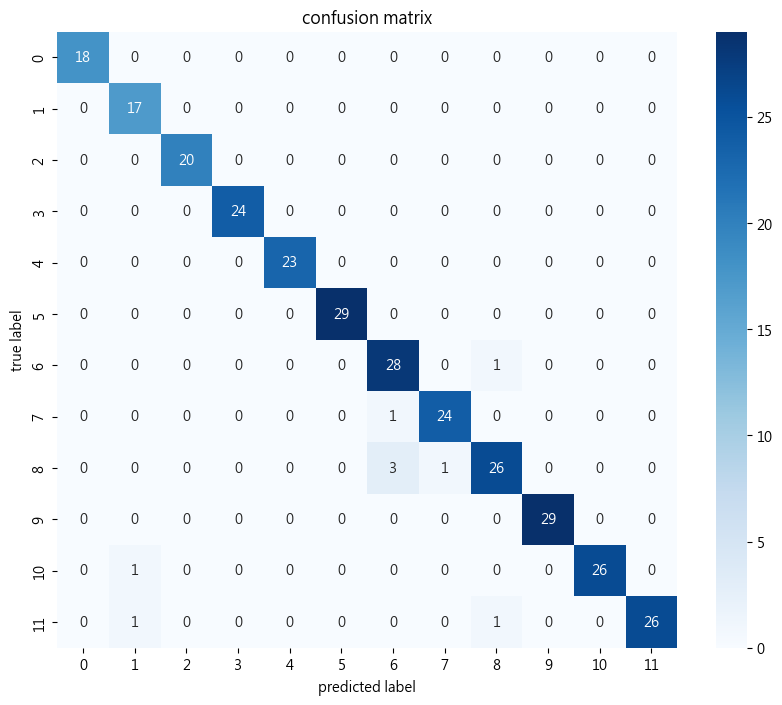

                                         precision    recall  f1-score   support

10_賽速安柏Thiamethoxam+Chlorantraniliprole       1.00      1.00      1.00        18
          11_展著劑PesticideDiffusingAgent       0.89      1.00      0.94        17
                      12_克枯爛Tecloftalam       1.00      1.00      1.00        20
                      1_嘉賜黴素Kasugamycin       1.00      1.00      1.00        24
          2_嘉賜貝芬Kasugamycin+Carbendazim       1.00      1.00      1.00        23
                       3_耐克螺Niclosamide       1.00      1.00      1.00        29
                         4_阿巴汀Abamectin       0.88      0.97      0.92        29
                        5_丁基拉草Butachlor       0.96      0.96      0.96        25
                6_賽洛寧Lambda-Cyhalothrin       0.93      0.87      0.90        30
                      7_賽氟滅Thifluzamide       1.00      1.00      1.00        29
                    8_亞賜圃Isoprothiolane       1.00      0.96      0.98        27
                         9_

In [36]:
model=clf.provide_models(X_train,X_test,y_train,y_test)[best_model[0]]
predict_train=model.predict(X_train)
#draw confusion matrix
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import confusion_matrix
import seaborn as sns
from lazypredict import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import os
plt.figure(figsize=(10, 8))
matplotlib.rc('font', family='Microsoft JhengHei')
cm = confusion_matrix(y_train, predict_train)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('confusion matrix')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
print(classification_report(y_train, predict_train))
#x_train merge y_train  dataset to csv
train=pd.concat([X_train,y_train],axis=1)
train.to_csv("train.csv",encoding="utf-8-sig")

#x_test merge y_test  dataset to csv
test=pd.concat([X_test,y_test],axis=1)
test.to_csv("test.csv",encoding="utf-8-sig")


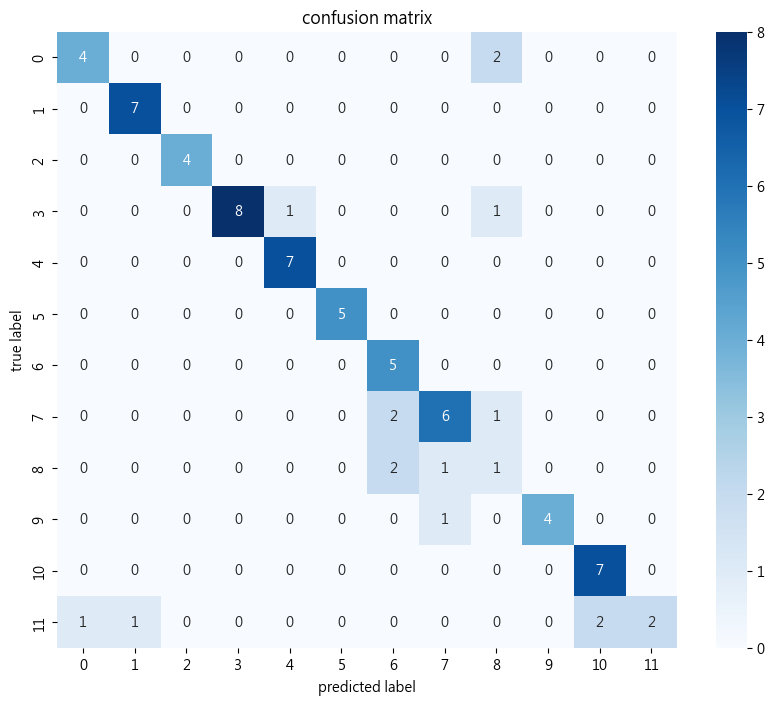

                                         precision    recall  f1-score   support

10_賽速安柏Thiamethoxam+Chlorantraniliprole       0.80      0.67      0.73         6
          11_展著劑PesticideDiffusingAgent       0.88      1.00      0.93         7
                      12_克枯爛Tecloftalam       1.00      1.00      1.00         4
                      1_嘉賜黴素Kasugamycin       1.00      0.80      0.89        10
          2_嘉賜貝芬Kasugamycin+Carbendazim       0.88      1.00      0.93         7
                       3_耐克螺Niclosamide       1.00      1.00      1.00         5
                         4_阿巴汀Abamectin       0.56      1.00      0.71         5
                        5_丁基拉草Butachlor       0.75      0.67      0.71         9
                6_賽洛寧Lambda-Cyhalothrin       0.20      0.25      0.22         4
                      7_賽氟滅Thifluzamide       1.00      0.80      0.89         5
                    8_亞賜圃Isoprothiolane       0.78      1.00      0.88         7
                         9_

In [33]:
#draw confusion matrix
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import confusion_matrix
import seaborn as sns
from lazypredict import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import os
plt.figure(figsize=(10, 8))
matplotlib.rc('font', family='Microsoft JhengHei')
cm = confusion_matrix(y_test, predict)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('confusion matrix')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
print(classification_report(y_test, predict))


In [34]:

#save model
import joblib
joblib.dump(model, "pesitide_raman.joblib")

['pesitide_raman.joblib']

In [35]:
model.summary()

AttributeError: 'Pipeline' object has no attribute 'summary'